implementation ideas:

try to seperate passenger id 

create 3 new features of planet

cabin feature engineering

destination feature engineering

children are mostly to be transported

Vip from euphor planet has almost transported (check with name) feature engineering

add amont and check transported probability

try featuring first name and check relation with transportation







import dependencies

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [352]:
#https://www.kaggle.com/competitions/spaceship-titanic/data?select=test.csv
df = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test.csv')

Data set seems balanced having equal number of classes

Work flow

1) Data Analysis

2) Missing Values and duplicate values

3) Categorical Encoding

4) Continuous values distribution

5) Outliers

6) Skewed data

7) Feature Engineering

8) Feature Selection

9) Model Selection

# Data Analysis

In [353]:
df.shape

(8693, 14)

In [354]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [355]:
df.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [356]:
len(df.PassengerId.unique())

8693

Every passenger Id is unique

In [357]:
df.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [358]:
df.groupby('HomePlanet')['Transported'].value_counts()

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      True           1404
            False           727
Mars        True            920
            False           839
Name: Transported, dtype: int64

Seems like people started from planet Europa are more likely to live

In [359]:
df.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

mostly of the people are not in cyrosleep

In [360]:
dir(df.groupby('CryoSleep')['Transported'])


['__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_agg_examples_doc',
 '_agg_general',
 '_agg_py_fallback',
 '_aggregate_multiple_funcs',
 '_aggregate_named',
 '_aggregate_with_numba',
 '_apply_allowlist',
 '_apply_filter',
 '_bool_agg',
 '_can_use_transform_fast',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_transform',
 '_dir_additions',
 '_dir_deletions',
 '_fill',
 '_get_cythonized_result',
 '_get_index',
 '_get_indices',
 '_gotitem',
 '_group_selection',
 '

In [361]:
df.groupby('CryoSleep')['Transported'].value_counts()/len(df)

CryoSleep  Transported
False      False          0.419878
           True           0.205798
True       True           0.285632
           False          0.063729
Name: Transported, dtype: float64

people who are in cyrosleep has more chance of getting transported

In [362]:
df.groupby('CryoSleep')['Transported'].value_counts()

CryoSleep  Transported
False      False          3650
           True           1789
True       True           2483
           False           554
Name: Transported, dtype: int64

In [363]:
df.groupby('CryoSleep')['HomePlanet'].value_counts()/len(df)

CryoSleep  HomePlanet
False      Earth         0.357299
           Europa        0.133671
           Mars          0.120442
True       Earth         0.158978
           Europa        0.104797
           Mars          0.076958
Name: HomePlanet, dtype: float64

people who are not in sleep are mostly from earth


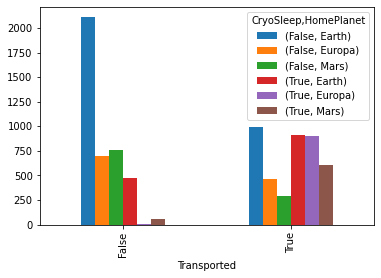

In [364]:
#df.groupby('Transported')['CryoSleep','HomePlanet'].value_counts()
pd.crosstab(df.Transported,[df.CryoSleep,df.HomePlanet]).plot(kind = 'bar')

In [365]:
len(df.Cabin.unique())

6561

In [366]:
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

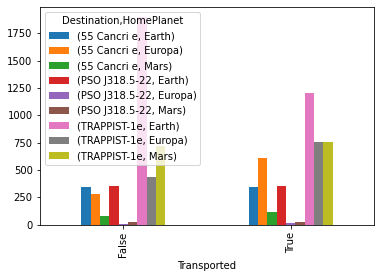

In [367]:
pd.crosstab(df.Transported,[df.Destination,df.HomePlanet]).plot(kind = 'bar')

In [368]:
df.groupby('Transported')['Destination'].value_counts()/len(df)


Transported  Destination  
False        TRAPPIST-1e      0.359830
             55 Cancri e      0.080755
             PSO J318.5-22    0.045439
True         TRAPPIST-1e      0.320603
             55 Cancri e      0.126309
             PSO J318.5-22    0.046129
Name: Destination, dtype: float64

In [369]:
pd.crosstab(df.Transported,df.Destination)/len(df)

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Transported,,,
False,0.080755,0.045439,0.359830
True,0.126309,0.046129,0.320603


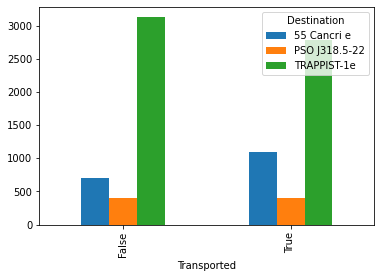

In [370]:
pd.crosstab(df.Transported,df.Destination).plot(kind = 'bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


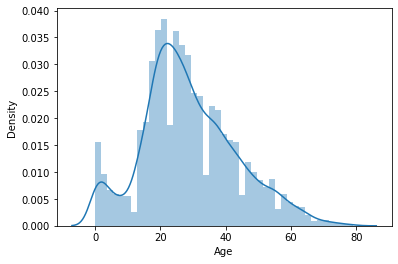

In [371]:
sns.distplot(df.Age)

looks like normally distributed lets check mean and median so we can tell whether its skewed or not

In [372]:
pd.crosstab(df.Transported,df.Age)

Age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0
Transported,,,,,,,,,,,,,,,,,,,,,
False,34,18,22,16,18,13,17,20,20,18,...,3,4,2,6,2,2,1,1,2,3
True,144,49,53,59,53,20,23,32,26,24,...,6,3,2,1,3,2,1,1,1,0


people with young age are likely to transport successfully

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


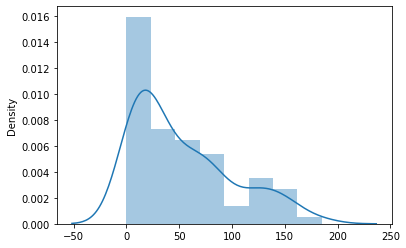

In [373]:
sns.distplot(pd.crosstab(df.Transported,df.Age))

In [374]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


age distribution seem to be slightly right skewed

In [375]:
df.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [376]:
pd.crosstab([df.VIP,df.HomePlanet],df.Transported)

Transported       False  True
VIP   HomePlanet             
False Earth        2583  1904
      Europa        646  1312
      Mars          770   883
True  Europa         67    64
      Mars           53    10

vip from europa has mostly transported


In [377]:
# k =[ 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# df[k].head()
# df['Amount'] = df.RoomService + df.FoodCourt + df.ShoppingMall + df.Spa + df.VRDeck


In [378]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [379]:
# df.Amount.describe()

In [380]:
len(df.Name.unique())

8474

In [381]:
len(df)

8693

#Missing Value

In [382]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [383]:
d = df.copy()
d =d[d['HomePlanet'].isna()]

In [384]:
d.Transported.value_counts()

True     103
False     98
Name: Transported, dtype: int64

Imputing Home planet nan values with mode

In [385]:
df.HomePlanet.mode()

0    Earth
dtype: object

In [386]:
df['HomePlanet'] = df['HomePlanet'].fillna('Earth')
test['HomePlanet'] = test['HomePlanet'].fillna('Earth')

In [387]:
df['HomePlanet'].isnull().sum()

0

In [388]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [389]:
d = df[df['CryoSleep'].isna()]

In [390]:
d.Transported.value_counts()

False    111
True     106
Name: Transported, dtype: int64

In [391]:
df['CryoSleep'] = df['CryoSleep'].fillna(False)
test['CryoSleep'] = test['CryoSleep'].fillna(False)

#df = df[df['CryoSleep'].notna()]


In [392]:
df['VIP'] = df['VIP'].fillna(False)
test['VIP'] = test['VIP'].fillna(False)

In [393]:
#df.isnull().sum()

print('*************')
test.isnull().sum()

*************


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination      92
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [394]:
df.CryoSleep.head()

0    False
1    False
2    False
3    False
4    False
Name: CryoSleep, dtype: bool

dropped nan values for cryo sleep

In [395]:
# # feature engineering for cabin
# deck = []
# side = []
# for i in df.Cabin:
#   print(i)
#   a = (i.split('/'))
#   deck.append(a[0])
#   side.append(a[2])

  
#   break
# print(deck,side)

dropping nan values for destination


In [396]:
#df = df[df['Destination'].notna()]
df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')
test['Destination'] = test['Destination'].fillna('TRAPPIST-1e')

imputing nan values of age with mean 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


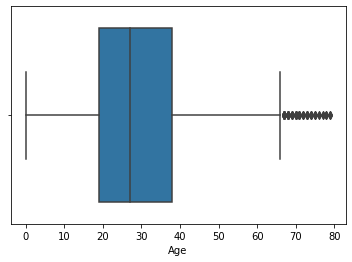

In [397]:
sns.boxplot(df.Age)

In [398]:
df['Age'] = df['Age'].fillna(df.Age.mean())
test['Age'] = test['Age'].fillna(test.Age.mean())


In [399]:
df.shape

(8693, 14)

In [400]:
test.isnull().sum(
    
)

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [401]:
# df = df[df['RoomService'].notna()]
# df = df[df['FoodCourt'].notna()]
# df = df[df['ShoppingMall'].notna()]
# df = df[df['Spa'].notna()]
# df = df[df['VRDeck'].notna()]
# df = df[df['Name'].notna()]

In [402]:

df.isnull().sum()


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [403]:
test.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

#Catergorical

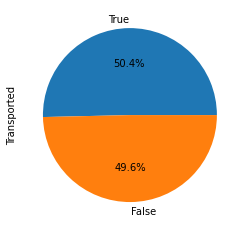

In [404]:
df.Transported.value_counts().plot.pie(autopct = '%1.1f%%')

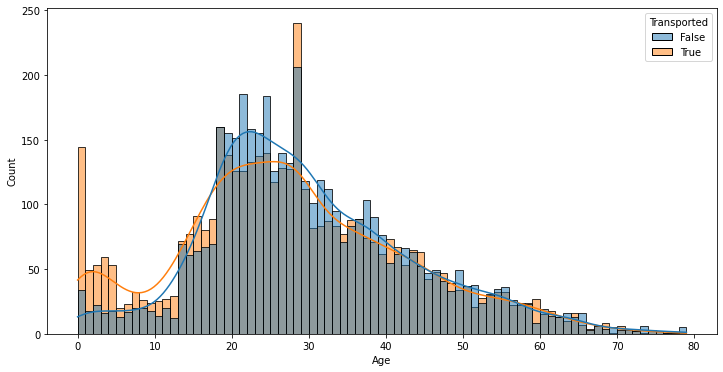

In [405]:
#sns.histplot(df,x = 'Transported',hue = 'Age')
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True)

In [406]:
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
#df['Num'] = df['VIP'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)
#test['Num'] = test['VIP'].astype(int)

In [407]:
def age_group(s):
    if s == 0:
        return -1
    elif (s > 0) & (s <= 11):
        return 1
    elif (s > 11) & (s <= 22):
        return 2
    elif (s > 22) & (s <= 33):
        return 3
    elif (s > 33) & (s <= 45):
        return 4
    elif (s > 45) & (s <= 56):
        return 5
    elif (s > 56) & (s <= 67):
        return 6
    elif (s > 67) & (s <= 79):
        return 7
    elif (s > 79) & (s <= 80):
        return 8
    
df['Age_Group'] = df['Age'].apply(age_group)
test['Age_Group'] = test['Age'].apply(age_group)

In [408]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_Group
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,4
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,3
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,6
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,2


In [409]:
features_cat = ['HomePlanet', 'Destination']
for feature in features_cat:
    df[pd.get_dummies(df[feature], prefix=feature).columns] = pd.get_dummies(df[feature], prefix=feature)
    test[pd.get_dummies(test[feature], prefix=feature).columns] = pd.get_dummies(test[feature], prefix=feature)

In [410]:
df.drop(['Cabin','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name','PassengerId','HomePlanet','Destination','Age'],axis = 'columns',inplace = True)
test.drop(['Cabin','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name','PassengerId','HomePlanet','Destination','Age'],axis = 'columns',inplace = True)

In [411]:
df.head()

,CryoSleep,VIP,Transported,Age_Group,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0,False,4,0,1,0,0,0,1
1,0,0,True,3,1,0,0,0,0,1
2,0,1,False,6,0,1,0,0,0,1
3,0,0,False,3,0,1,0,0,0,1
4,0,0,True,2,1,0,0,0,0,1


In [412]:
x_train = df.drop(['Transported'], axis=1)
y_train = df['Transported']
x_test = test

In [413]:
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 12],
    "min_samples_leaf" : [18, 19, 20],
    "min_samples_split" : [8, 9, 10]
}


RFC_Model = RandomForestClassifier()
RFC_grid = GridSearchCV(RFC_Model, param_grid = parameters, cv = 5, scoring = 'accuracy', n_jobs= -1)
RFC_grid.fit(x_train, y_train)
print('Best Parameters : ', RFC_grid.best_params_)
print()
print('Best Accuracy : ', RFC_grid.best_score_)

Best Parameters :  {'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 8, 'n_estimators': 15}

Best Accuracy :  0.7359971042707375


In [414]:
rf = RandomForestClassifier(max_depth= 12, min_samples_leaf= 18, min_samples_split= 9, n_estimators= 25)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [416]:
subs = pd.read_csv('/content/sample_submission.csv')
subs

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [419]:
subs['Transported'] = y_pred_rf
subs.to_csv('./Transported', index = False)